In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import LinearSVC

In [ ]:
df=pd.read_csv('train.csv',index_col='id')

In [ ]:
df.head()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
id,,,,,,,,,,
id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [ ]:
df.columns

Index(['vendor_id', 'pickup_datetime', 'dropoff_datetime', 'passenger_count',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'store_and_fwd_flag', 'trip_duration'],
      dtype='object')

In [ ]:
df.isnull().sum()

,0
vendor_id,0
pickup_datetime,0
dropoff_datetime,0
passenger_count,0
pickup_longitude,0
pickup_latitude,0
dropoff_longitude,0
dropoff_latitude,0
store_and_fwd_flag,0
trip_duration,0


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
vendor_id,1458644.0,1.534950,0.498777,1.000000,1.000000,2.000000,2.000000,2.000000e+00
passenger_count,1458644.0,1.664530,1.314242,0.000000,1.000000,1.000000,2.000000,9.000000e+00
pickup_longitude,1458644.0,-73.973486,0.070902,-121.933342,-73.991867,-73.981743,-73.967331,-6.133553e+01
pickup_latitude,1458644.0,40.750921,0.032881,34.359695,40.737347,40.754101,40.768360,5.188108e+01
dropoff_longitude,1458644.0,-73.973416,0.070643,-121.933304,-73.991325,-73.979752,-73.963013,-6.133553e+01
dropoff_latitude,1458644.0,40.751800,0.035891,32.181141,40.735885,40.754524,40.769810,4.392103e+01
trip_duration,1458644.0,959.492273,5237.431724,1.000000,397.000000,662.000000,1075.000000,3.526282e+06


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1458644 entries, id2875421 to id1209952
Data columns (total 10 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   vendor_id           1458644 non-null  int64  
 1   pickup_datetime     1458644 non-null  object 
 2   dropoff_datetime    1458644 non-null  object 
 3   passenger_count     1458644 non-null  int64  
 4   pickup_longitude    1458644 non-null  float64
 5   pickup_latitude     1458644 non-null  float64
 6   dropoff_longitude   1458644 non-null  float64
 7   dropoff_latitude    1458644 non-null  float64
 8   store_and_fwd_flag  1458644 non-null  object 
 9   trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(3)
memory usage: 122.4+ MB


In [ ]:
df.dtypes

,0
vendor_id,int64
pickup_datetime,object
dropoff_datetime,object
passenger_count,int64
pickup_longitude,float64
pickup_latitude,float64
dropoff_longitude,float64
dropoff_latitude,float64
store_and_fwd_flag,object
trip_duration,int64


In [ ]:
df['pickup_datetime'] = pd.to_datetime(df.pickup_datetime)
df['dropoff_datetime'] = pd.to_datetime(df.dropoff_datetime)

In [ ]:
df.dtypes

,0
vendor_id,int64
pickup_datetime,datetime64[ns]
dropoff_datetime,datetime64[ns]
passenger_count,int64
pickup_longitude,float64
pickup_latitude,float64
dropoff_longitude,float64
dropoff_latitude,float64
store_and_fwd_flag,object
trip_duration,int64


<Axes: xlabel='store_and_fwd_flag', ylabel='count'>

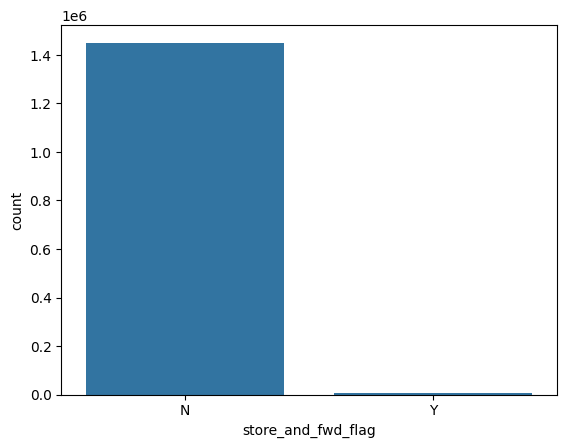

In [ ]:
sns.countplot(x='store_and_fwd_flag', data=df)

In [ ]:
R=6371
def haversine(lon1, lat1, lon2, lat2):
  lon1, lat1, lon2, lat2=map(np.radians,[lon1,lat1,lon2,lat2])
  dlon = lon2 - lon1
  dlat = lat2 - lat1
  a = np.sin(dlat/2)**2 + np.cos(lat1)*np.cos(lat2)*np.sin(dlon/2)**2
  c=2*np.arcsin(np.sqrt(a))
  return R*c

In [ ]:
df['trip_distance'] = haversine(
    df['pickup_longitude'],
    df['pickup_latitude'],
    df['dropoff_longitude'],
    df['dropoff_latitude']
)
df.head()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,trip_distance
id,,,,,,,,,,,
id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,1.498521
id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,1.805507
id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,6.385098
id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,1.485498
id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,1.188588


In [ ]:
df['pickup_hour'] = df['pickup_datetime'].dt.hour
df['pickup_dayofweek'] = df['pickup_datetime'].dt.dayofweek
df.head()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,trip_distance,pickup_hour,pickup_dayofweek
id,,,,,,,,,,,,,
id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,1.498521,17,0
id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,1.805507,0,6
id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,6.385098,11,1
id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,1.485498,19,2
id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,1.188588,13,5


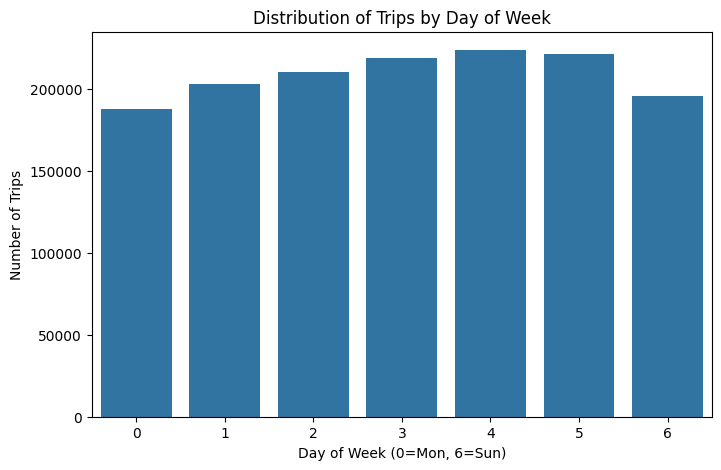

In [ ]:
day_counts = df['pickup_datetime'].dt.dayofweek.value_counts().sort_index()

plt.figure(figsize=(8,5))
sns.barplot(x=day_counts.index, y=day_counts.values)
plt.xlabel("Day of Week (0=Mon, 6=Sun)")
plt.ylabel("Number of Trips")
plt.title("Distribution of Trips by Day of Week")
plt.show()

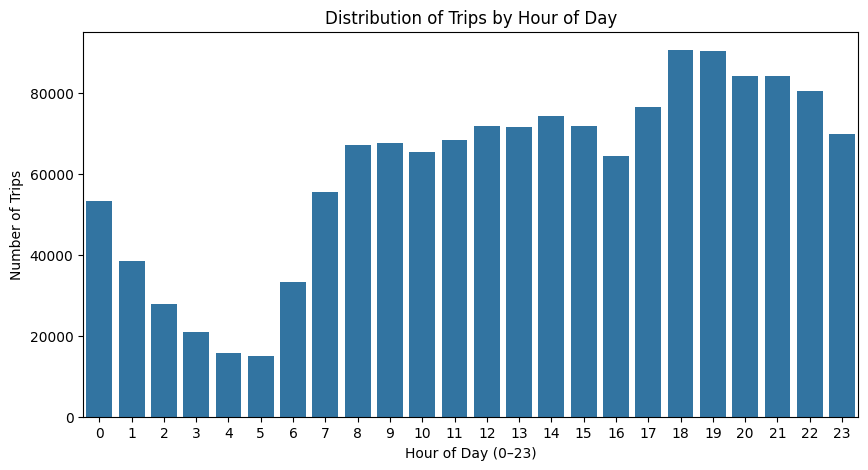

In [ ]:
hour_counts = df['pickup_datetime'].dt.hour.value_counts().sort_index()

plt.figure(figsize=(10,5))
sns.barplot(x=hour_counts.index, y=hour_counts.values)
plt.xlabel("Hour of Day (0–23)")
plt.ylabel("Number of Trips")
plt.title("Distribution of Trips by Hour of Day")
plt.show()


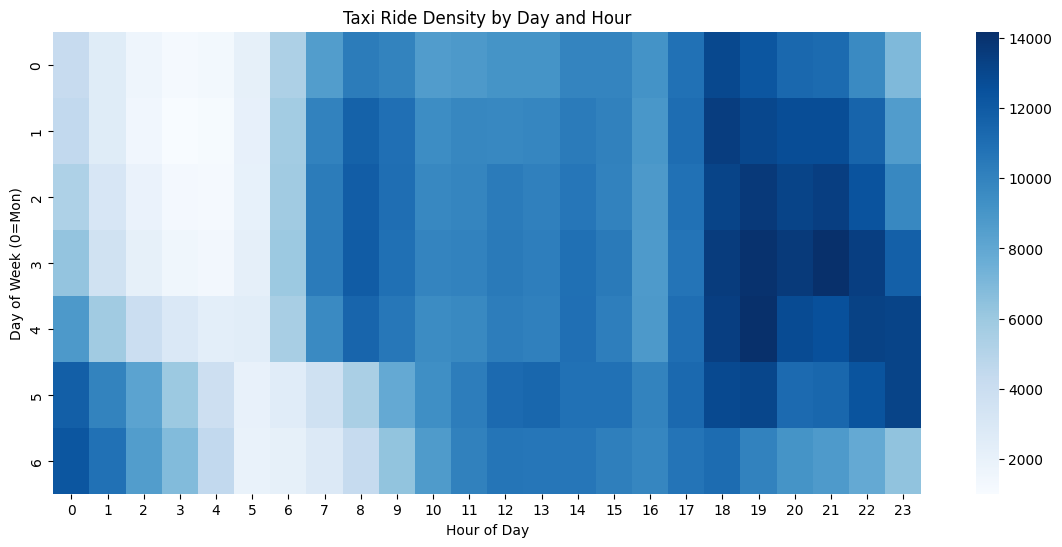

In [ ]:
df['day'] = df['pickup_datetime'].dt.dayofweek
df['hour'] = df['pickup_datetime'].dt.hour

pivot = df.pivot_table(index='day', columns='hour', aggfunc='size', fill_value=0)

plt.figure(figsize=(14,6))
sns.heatmap(pivot, cmap="Blues")
plt.xlabel("Hour of Day")
plt.ylabel("Day of Week (0=Mon)")
plt.title("Taxi Ride Density by Day and Hour")
plt.show()


In [ ]:
df['is_weekend'] = df['pickup_dayofweek'].isin([5,6]).astype(int)
df['is_rush_hour'] = df['pickup_hour'].isin([17,18,19,20,21,22]).astype(int)

In [ ]:
def cat_label(df):
    df = df.copy()
    def rule(row):
        d = row['trip_distance']
        h = row['pickup_hour']
        rush = row['is_rush_hour']
        if d < 1: return 0
        if d > 50: return 0
        if d < 3 and rush == 1: return 0
        if 0 <= h <= 5: return 0
        return 1
    df['ride_accept'] = df.apply(rule, axis=1)
    return df
df_n=cat_label(df)
df_n.head()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,trip_distance,pickup_hour,pickup_dayofweek,day,hour,is_weekend,is_rush_hour,ride_accept
id,,,,,,,,,,,,,,,,,,
id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,1.498521,17,0,0,17,0,1,0
id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,1.805507,0,6,6,0,1,0,0
id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,6.385098,11,1,1,11,0,0,1
id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,1.485498,19,2,2,19,0,1,0
id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,1.188588,13,5,5,13,1,0,1


/tmp/ipython-input-510343517.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='ride_accept', data=df_n, palette=['Blue','Orange'])


<Axes: xlabel='ride_accept', ylabel='count'>

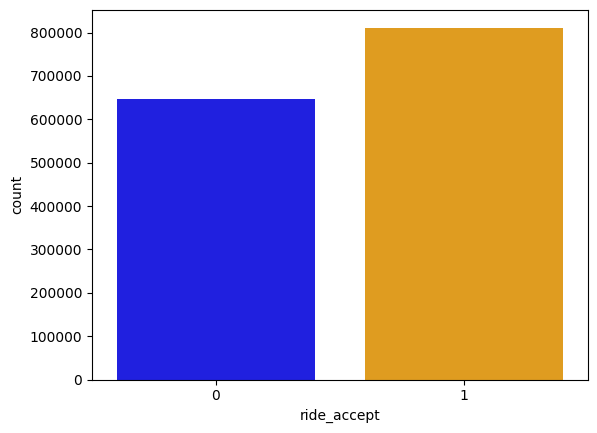

In [ ]:
sns.countplot(x='ride_accept', data=df_n, palette=['Blue','Orange'])

In [ ]:
class LogisticRegression:
    def __init__(self, learning_rate=0.01, iterations=2000):
        self.lr = learning_rate
        self.iterations = iterations
        self.weights = None
        self.bias = 0
        self.cost_history = []

    def sigmoid(self, z):
        """Numerically stable sigmoid"""
        return np.where(
            z >= 0,
            1 / (1 + np.exp(-z)),
            np.exp(z) / (1 + np.exp(z))
        )

    def cost(self, h, y):
        """Cross-entropy loss"""
        m = len(y)
        eps = 1e-9
        return - (1/m) * np.sum(y*np.log(h+eps) + (1-y)*np.log(1-h+eps))

    def fit(self, X, y):
        """Train model using gradient descent"""
        m, n = X.shape
        self.weights = np.zeros(n)

        for _ in range(self.iterations):
            z = np.dot(X, self.weights) + self.bias
            h = self.sigmoid(z)

            dw = (1/m) * np.dot(X.T, (h - y))
            db = (1/m) * np.sum(h - y)

            self.weights -= self.lr * dw
            self.bias -= self.lr * db

            self.cost_history.append(self.cost(h, y))

    def predict(self, X):
        """Make predictions"""
        return (self.sigmoid(np.dot(X, self.weights) + self.bias) >= 0.5).astype(int)

In [ ]:
df_n.columns


Index(['vendor_id', 'pickup_datetime', 'dropoff_datetime', 'passenger_count',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'store_and_fwd_flag', 'trip_duration',
       'trip_distance', 'pickup_hour', 'pickup_dayofweek', 'day', 'hour',
       'is_weekend', 'is_rush_hour', 'ride_accept'],
      dtype='object')

In [ ]:
df_n = df_n.drop([
    'pickup_datetime',
    'dropoff_datetime',
    'pickup_longitude',
    'pickup_latitude',
    'dropoff_longitude',
    'dropoff_latitude',
    'trip_duration',
    'vendor_id',
    'day','hour'
], axis=1)
df_n.head()

,passenger_count,store_and_fwd_flag,trip_distance,pickup_hour,pickup_dayofweek,is_weekend,is_rush_hour,ride_accept
id,,,,,,,,
id2875421,1,N,1.498521,17,0,0,1,0
id2377394,1,N,1.805507,0,6,1,0,0
id3858529,1,N,6.385098,11,1,0,0,1
id3504673,1,N,1.485498,19,2,0,1,0
id2181028,1,N,1.188588,13,5,1,0,1


In [ ]:
df_n['store_and_fwd_flag'] = df_n['store_and_fwd_flag'].map({'N': 0, 'Y': 1})
df_n.head()

,passenger_count,store_and_fwd_flag,trip_distance,pickup_hour,pickup_dayofweek,is_weekend,is_rush_hour,ride_accept
id,,,,,,,,
id2875421,1,0,1.498521,17,0,0,1,0
id2377394,1,0,1.805507,0,6,1,0,0
id3858529,1,0,6.385098,11,1,0,0,1
id3504673,1,0,1.485498,19,2,0,1,0
id2181028,1,0,1.188588,13,5,1,0,1


In [ ]:
X=df_n.drop('ride_accept',axis=1)
y=df_n['ride_accept']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=42, stratify=y)

In [ ]:
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

In [ ]:
model=LogisticRegression()
model.fit(X_train_s,y_train)

In [ ]:
train_preds = model.predict(X_test_s)

In [ ]:
print("Accuracy :", accuracy_score(y_test, train_preds))
print("Precision:", precision_score(y_test, train_preds))
print("Recall   :", recall_score(y_test, train_preds))
print("F1 Score :", f1_score(y_test, train_preds))

Accuracy : 0.8086993880172032
Precision: 0.8216063202654382
Recall   : 0.8381228178270692
F1 Score : 0.8297823885610642


In [ ]:
df_test=pd.read_csv('/content/test.csv',index_col='id')
df_test.head()

,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag
id,,,,,,,,
id3004672,1,2016-06-30 23:59:58,1,-73.988129,40.732029,-73.990173,40.756680,N
id3505355,1,2016-06-30 23:59:53,1,-73.964203,40.679993,-73.959808,40.655403,N
id1217141,1,2016-06-30 23:59:47,1,-73.997437,40.737583,-73.986160,40.729523,N
id2150126,2,2016-06-30 23:59:41,1,-73.956070,40.771900,-73.986427,40.730469,N
id1598245,1,2016-06-30 23:59:33,1,-73.970215,40.761475,-73.961510,40.755890,N


In [ ]:
df_test.isnull().sum()

,0
vendor_id,0
pickup_datetime,0
passenger_count,0
pickup_longitude,0
pickup_latitude,0
dropoff_longitude,0
dropoff_latitude,0
store_and_fwd_flag,0


In [ ]:
df_test['trip_distance'] = haversine(
    df_test['pickup_longitude'],
    df_test['pickup_latitude'],
    df_test['dropoff_longitude'],
    df_test['dropoff_latitude']
)
df_test.head()

,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_distance
id,,,,,,,,,
id3004672,1,2016-06-30 23:59:58,1,-73.988129,40.732029,-73.990173,40.756680,N,2.746426
id3505355,1,2016-06-30 23:59:53,1,-73.964203,40.679993,-73.959808,40.655403,N,2.759239
id1217141,1,2016-06-30 23:59:47,1,-73.997437,40.737583,-73.986160,40.729523,N,1.306155
id2150126,2,2016-06-30 23:59:41,1,-73.956070,40.771900,-73.986427,40.730469,N,5.269088
id1598245,1,2016-06-30 23:59:33,1,-73.970215,40.761475,-73.961510,40.755890,N,0.960842


In [ ]:
df_test['pickup_datetime'] = pd.to_datetime(df_test.pickup_datetime)
df_test_n=df_test.copy()
df_test_n['pickup_hour'] = df_test['pickup_datetime'].dt.hour
df_test_n['pickup_dayofweek'] = df_test['pickup_datetime'].dt.dayofweek

In [ ]:
df_test_n['is_weekend'] = df_test_n['pickup_dayofweek'].isin([5,6]).astype(int)
df_test_n['is_rush_hour']  = df_test_n['pickup_hour'].isin([17,18,19,20,21,22]).astype(int)

In [ ]:
df_test_n['store_and_fwd_flag'] = df_test_n['store_and_fwd_flag'].map({'N': 0, 'Y': 1})

In [ ]:
df_test_n.columns

Index(['vendor_id', 'pickup_datetime', 'passenger_count', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'store_and_fwd_flag', 'trip_distance', 'pickup_hour',
       'pickup_dayofweek', 'is_weekend', 'is_rush_hour'],
      dtype='object')

In [ ]:
df_test_n.head()

,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_distance,pickup_hour,pickup_dayofweek,is_weekend,is_rush_hour
id,,,,,,,,,,,,,
id3004672,1,2016-06-30 23:59:58,1,-73.988129,40.732029,-73.990173,40.756680,0,2.746426,23,3,0,0
id3505355,1,2016-06-30 23:59:53,1,-73.964203,40.679993,-73.959808,40.655403,0,2.759239,23,3,0,0
id1217141,1,2016-06-30 23:59:47,1,-73.997437,40.737583,-73.986160,40.729523,0,1.306155,23,3,0,0
id2150126,2,2016-06-30 23:59:41,1,-73.956070,40.771900,-73.986427,40.730469,0,5.269088,23,3,0,0
id1598245,1,2016-06-30 23:59:33,1,-73.970215,40.761475,-73.961510,40.755890,0,0.960842,23,3,0,0


In [ ]:
df_test_n=df_test_n.drop(['vendor_id',
    'pickup_longitude',
    'pickup_latitude',
    'dropoff_longitude',
    'dropoff_latitude',
    'pickup_datetime'
], axis=1)

In [ ]:
X_test_n=df_test_n
X_test_n.head()

,passenger_count,store_and_fwd_flag,trip_distance,pickup_hour,pickup_dayofweek,is_weekend,is_rush_hour
id,,,,,,,
id3004672,1,0,2.746426,23,3,0,0
id3505355,1,0,2.759239,23,3,0,0
id1217141,1,0,1.306155,23,3,0,0
id2150126,1,0,5.269088,23,3,0,0
id1598245,1,0,0.960842,23,3,0,0


In [ ]:
X_test_scaled = scaler.transform(X_test_n)


In [ ]:
preds = model.predict(X_test_scaled)

In [ ]:
df_test_n['accept']=preds
df_test_n.head()

,passenger_count,store_and_fwd_flag,trip_distance,pickup_hour,pickup_dayofweek,is_weekend,is_rush_hour,accept
id,,,,,,,,
id3004672,1,0,2.746426,23,3,0,0,1
id3505355,1,0,2.759239,23,3,0,0,1
id1217141,1,0,1.306155,23,3,0,0,1
id2150126,1,0,5.269088,23,3,0,0,1
id1598245,1,0,0.960842,23,3,0,0,1


In [ ]:
df_test_n['accept'].value_counts()

,count
accept,
1,355111
0,270023


In [ ]:
def plot_cost(model, title="Cost Function Convergence"):
    plt.figure(figsize=(8,6))
    plt.plot(model.cost_history)
    plt.title(title)
    plt.xlabel("Iterations")
    plt.ylabel("Cost")
    plt.grid(True)
    plt.show()

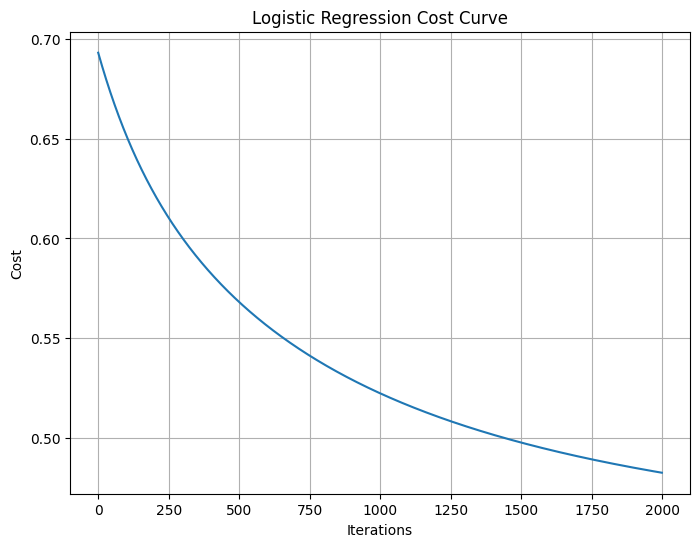

In [ ]:
plot_cost(model,'Logistic Regression Cost Curve')

In [ ]:
class LogisticRegressionL1:
    def __init__(self, learning_rate=0.01, iterations=2000, lam=0.1):
        self.lr = learning_rate
        self.iterations = iterations
        self.lam = lam
        self.weights = None
        self.bias = 0
        self.cost_history = []

    def sigmoid(self, z):
        """Numerically stable sigmoid"""
        return np.where(
            z >= 0,
            1 / (1 + np.exp(-z)),
            np.exp(z) / (1 + np.exp(z))
        )

    def cost(self, h, y):
        """Cross-entropy loss + L1 penalty"""
        m = len(y)
        eps = 1e-9
        log_loss = - (1/m) * np.sum(y*np.log(h+eps) + (1-y)*np.log(1-h+eps))
        l1_penalty = (self.lam / m) * np.sum(np.abs(self.weights))
        return log_loss + l1_penalty

    def fit(self, X, y):
        """Train using gradient descent"""
        m, n = X.shape
        self.weights = np.zeros(n)

        for _ in range(self.iterations):
            z = np.dot(X, self.weights) + self.bias
            h = self.sigmoid(z)
            dw = (1/m) * np.dot(X.T, (h - y)) + (self.lam / m) * np.sign(self.weights)
            db = (1/m) * np.sum(h - y)

            self.weights -= self.lr * dw
            self.bias -= self.lr * db

            self.cost_history.append(self.cost(h, y))

    def predict(self, X):
        return (self.sigmoid(np.dot(X, self.weights) + self.bias) >= 0.5).astype(int)


In [ ]:
model1=LogisticRegressionL1()
model1.fit(X_train_s,y_train)
train_pred1=model1.predict(X_test_s)

In [ ]:
print("Accuracy :", accuracy_score(y_test, train_pred1))
print("Precision:", precision_score(y_test, train_pred1))
print("Recall   :", recall_score(y_test, train_pred1))
print("F1 Score :", f1_score(y_test, train_pred1))

Accuracy : 0.8086993880172032
Precision: 0.8216063202654382
Recall   : 0.8381228178270692
F1 Score : 0.8297823885610642


In [ ]:
preds1=model1.predict(X_test_scaled)

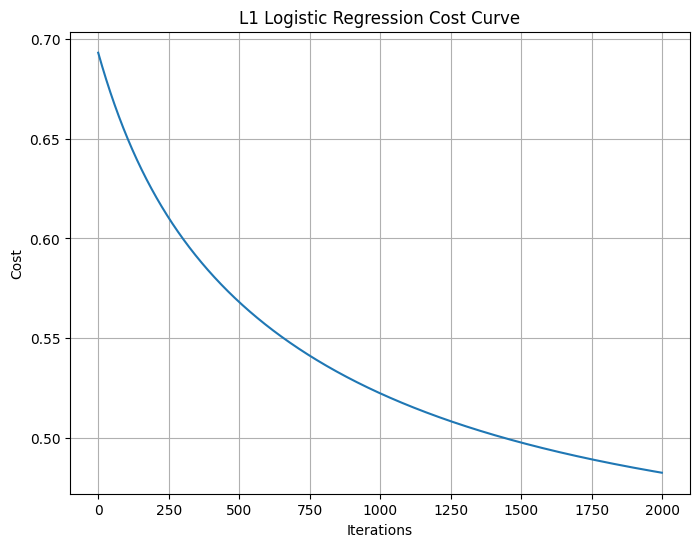

In [ ]:
plot_cost(model1, "L1 Logistic Regression Cost Curve")

In [ ]:
class LogisticRegressionL2:
    def __init__(self, learning_rate=0.01, iterations=2000, lam=0.1):
        self.lr = learning_rate
        self.iterations = iterations
        self.lam = lam          # L2 penalty strength
        self.weights = None
        self.bias = 0
        self.cost_history = []

    def sigmoid(self, z):
        """Numerically stable sigmoid"""
        return np.where(
            z >= 0,
            1 / (1 + np.exp(-z)),
            np.exp(z) / (1 + np.exp(z))
        )

    def cost(self, h, y):
        """Cross-entropy loss + L2 penalty"""
        m = len(y)
        eps = 1e-9
        log_loss = - (1/m) * np.sum(y*np.log(h+eps) + (1-y)*np.log(1-h+eps))
        l2_penalty = (self.lam / (2*m)) * np.sum(self.weights ** 2)
        return log_loss + l2_penalty

    def fit(self, X, y):
        """Train using gradient descent"""
        m, n = X.shape
        self.weights = np.zeros(n)

        for _ in range(self.iterations):
            z = np.dot(X, self.weights) + self.bias
            h = self.sigmoid(z)

            # Gradient with L2 penalty
            dw = (1/m) * np.dot(X.T, (h - y)) + (self.lam / m) * self.weights
            db = (1/m) * np.sum(h - y)

            self.weights -= self.lr * dw
            self.bias -= self.lr * db

            self.cost_history.append(self.cost(h, y))

    def predict(self, X):
        return (self.sigmoid(np.dot(X, self.weights) + self.bias) >= 0.5).astype(int)


In [ ]:
model2=LogisticRegressionL2()
model2.fit(X_train_s,y_train)
train_pred2=model2.predict(X_test_s)

In [ ]:
print("Accuracy :", accuracy_score(y_test, train_pred2))
print("Precision:", precision_score(y_test, train_pred2))
print("Recall   :", recall_score(y_test, train_pred2))
print("F1 Score :", f1_score(y_test, train_pred2))

Accuracy : 0.8086993880172032
Precision: 0.8216063202654382
Recall   : 0.8381228178270692
F1 Score : 0.8297823885610642


In [ ]:
preds2=model2.predict(X_test_scaled)

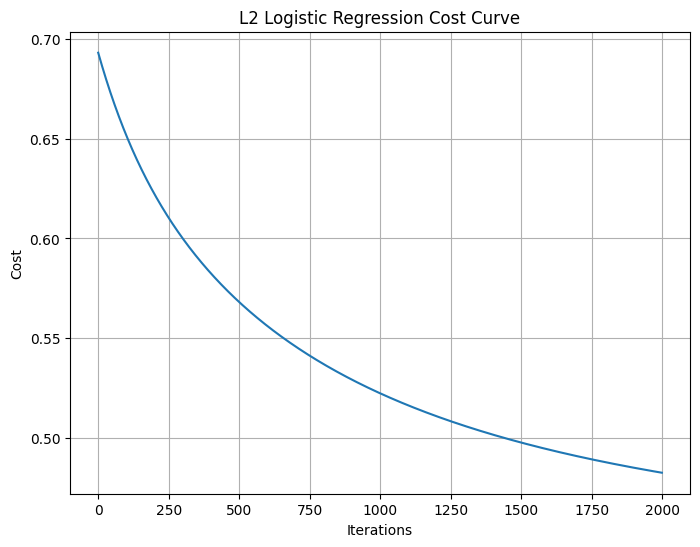

In [ ]:
plot_cost(model2, "L2 Logistic Regression Cost Curve")


In [ ]:
def evaluate_model(model, X_val, y_val, name):
    preds = model.predict(X_val)
    print(f"\n===== {name} =====")
    print("Accuracy :", accuracy_score(y_val, preds))
    print("Precision:", precision_score(y_val, preds))
    print("Recall   :", recall_score(y_val, preds))
    print("F1 Score :", f1_score(y_val, preds))

In [ ]:
dt_params = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

model_dt = DecisionTreeClassifier(class_weight='balanced')

dt_grid = GridSearchCV(model_dt, dt_params, cv=3, scoring='accuracy', n_jobs=-1)
dt_grid.fit(X_train_s, y_train)

dt_best = dt_grid.best_estimator_

evaluate_model(dt_best, X_test_s,y_test, "Decision Tree (Best)")


===== Decision Tree (Best) =====
Accuracy : 0.9999885738835541
Precision: 1.0
Recall   : 0.9999794619018278
F1 Score : 0.9999897308454595


In [ ]:
pred_dt=dt_best.predict(X_test_scaled)

In [ ]:
model_rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=15,
    min_samples_split=5,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)

model_rf.fit(X_train_s, y_train)
evaluate_model(model_rf, X_test_s, y_test, "Random Forest")


===== Random Forest =====
Accuracy : 0.9999748625438192
Precision: 0.9999671397178124
Recall   : 0.9999876771410967
F1 Score : 0.9999774083240057


In [ ]:
preds_rf=model_rf.predict(X_test_scaled)

In [ ]:
gb = GradientBoostingClassifier(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=3,
    random_state=42
)

gb.fit(X_train_s, y_train)
evaluate_model(gb, X_test_s, y_test, "Gradient Boosting")


===== Gradient Boosting =====
Accuracy : 0.9999977147767108
Precision: 0.9999958923972381
Recall   : 1.0
F1 Score : 0.999997946194401


In [ ]:
preds_gb=gb.predict(X_test_scaled)